In [2]:
import os
os.chdir('../')

In [ ]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/fonts']
font_files = fm.findSystemFonts(font_dirs)

for font_file in font_files:
  fm.fontManager.addfont(font_file)

fonts = [f.name for f in fm.fontManager.ttflist]

for font in fonts:
  print(font)

In [ ]:
import numpy as np
import polars as pl
from plotnine import *
from mizani.formatters import comma_format
import nltk
from nltk.corpus import stopwords

In [38]:
theme_set(
  theme_538() +
  theme(
    panel_grid_major=element_blank(),
    text=element_text(family='Nunito Sans', color='#1C1C1C')
  )
)

In [18]:
df_train = pl.read_csv('dataset/MELD/train_sent_emo.csv')
df_dev = pl.read_csv('dataset/MELD/dev_sent_emo.csv')
df_test = pl.read_csv('dataset/MELD/test_sent_emo.csv')

df = pl.concat(
  [df_train, df_dev, df_test]
)

# Sentence Counts by Emotions

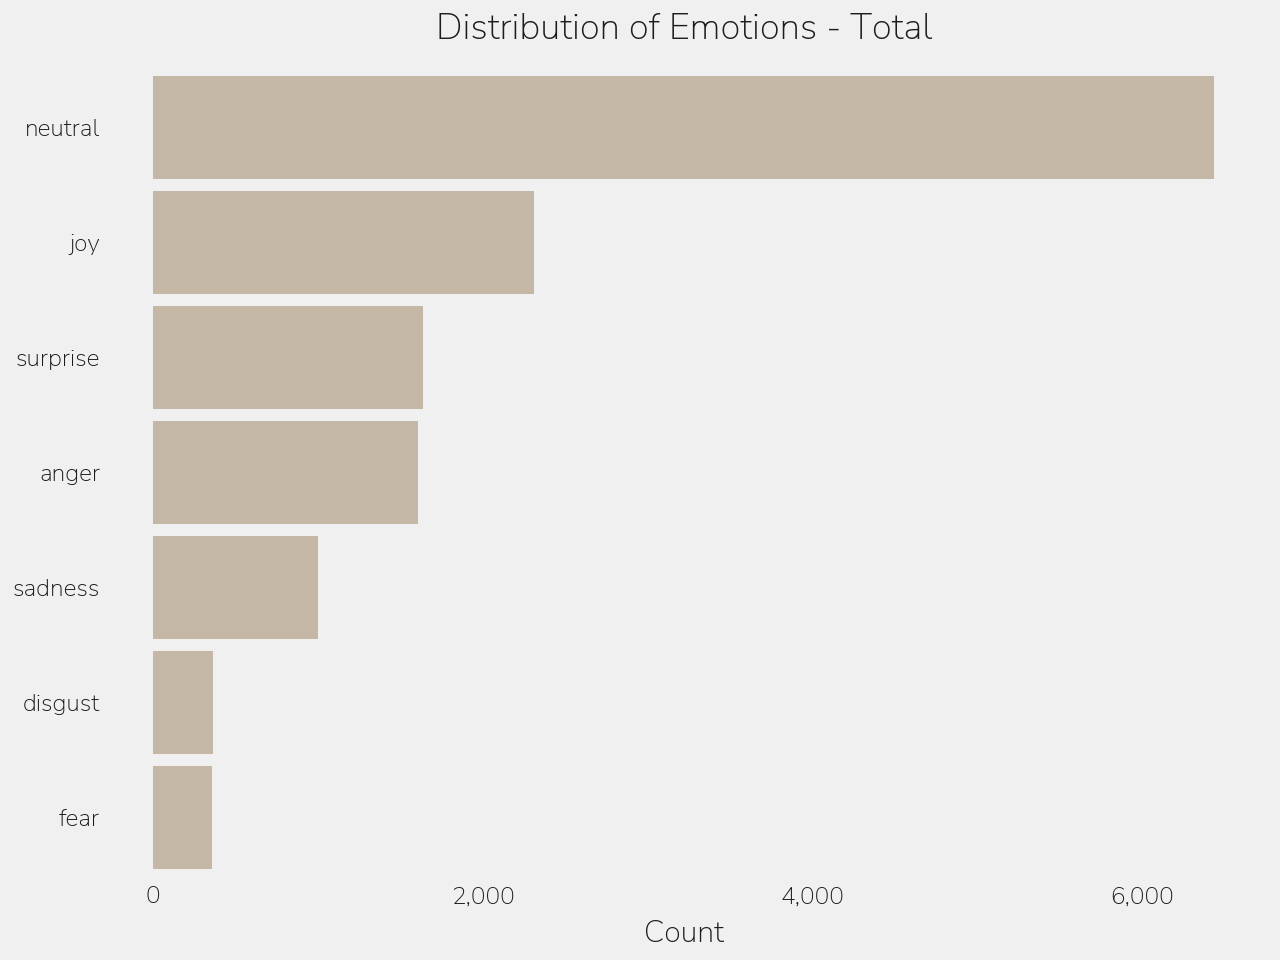

In [39]:
df_plot = df.group_by('Emotion').agg(pl.len().alias('Count')).sort(by='Count', descending=False)

dtype = pl.Enum(df_plot.select(pl.col('Emotion')).to_series().to_list())

(
  ggplot(
    df_plot.with_columns(pl.col('Emotion').cast(dtype)), aes('Emotion', 'Count')) +
  geom_col(fill='#C4B7A6') +
  scale_y_continuous(labels=comma_format()) +
  labs(title='Distribution of Emotions - Total', x='') +
  coord_flip()
)

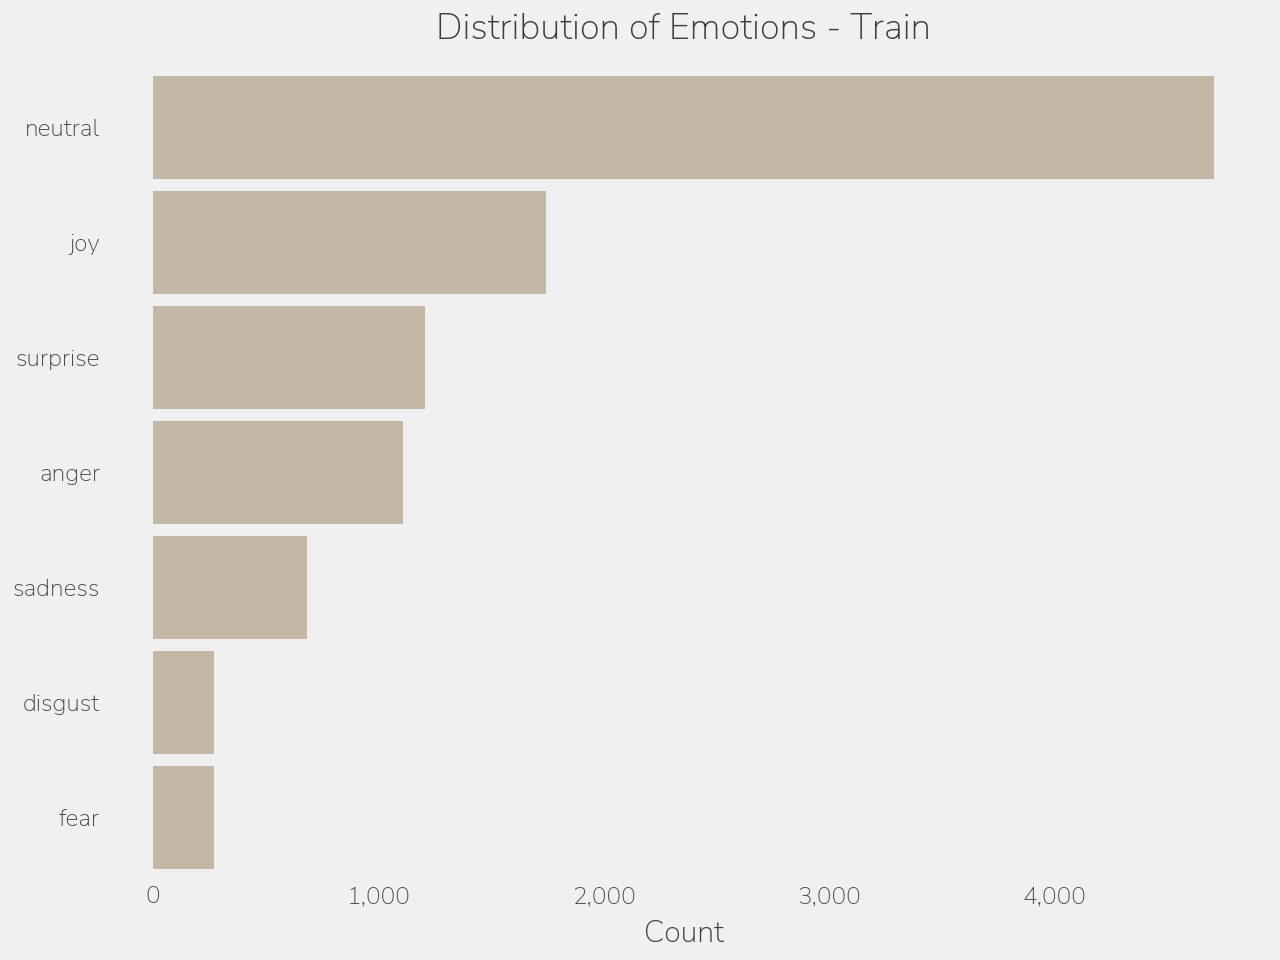

In [30]:
df_plot = df_train.group_by('Emotion').agg(pl.len().alias('Count')).sort(by='Count', descending=False)

(
  ggplot(
    df_plot.with_columns(pl.col('Emotion').cast(dtype)), aes('Emotion', 'Count')) +
  geom_col(fill='#C4B7A6') +
  scale_y_continuous(labels=comma_format()) +
  labs(title='Distribution of Emotions - Train', x='') +
  coord_flip()
)

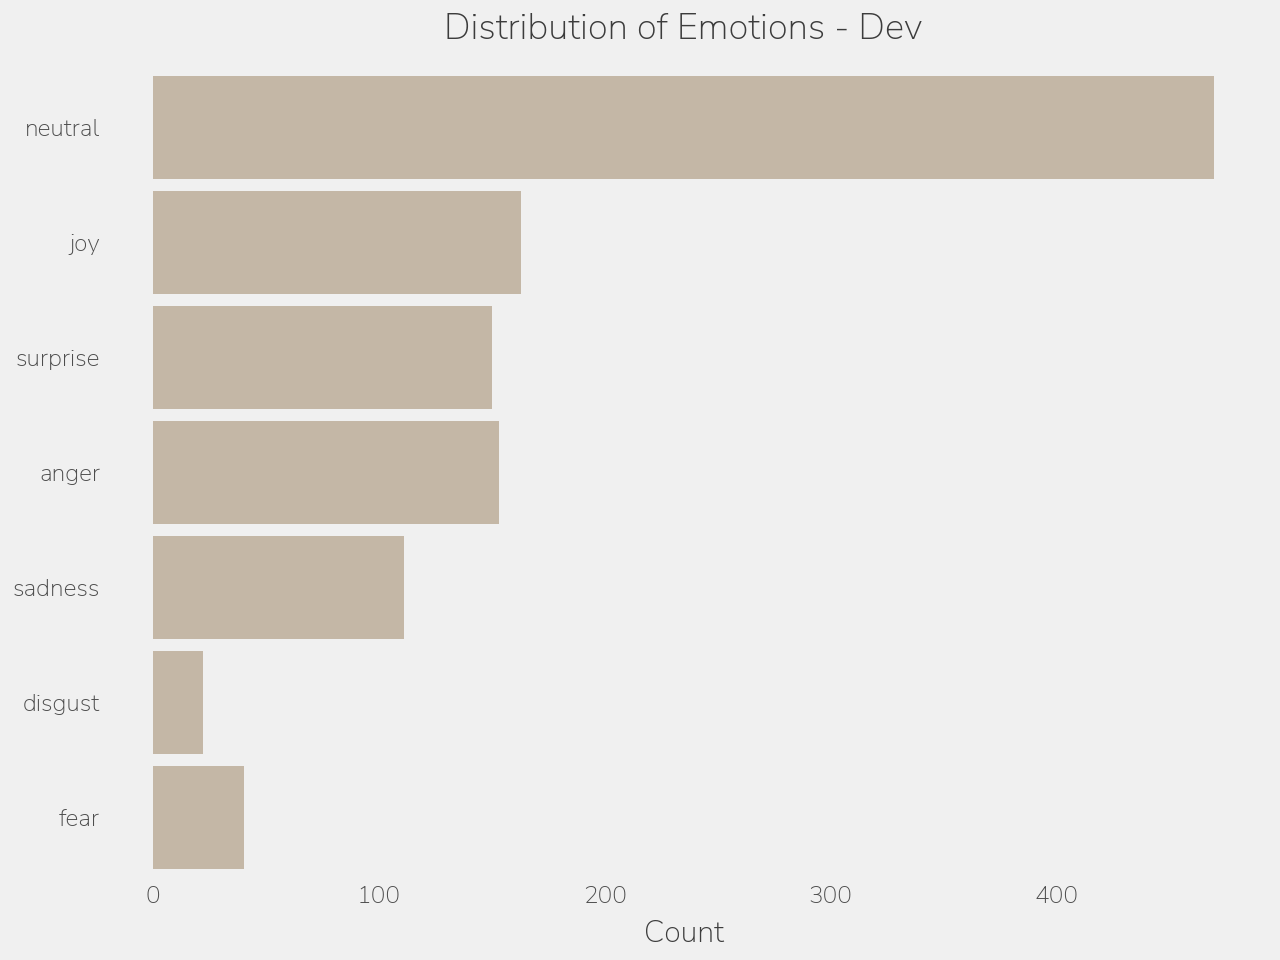

In [31]:
df_plot = df_dev.group_by('Emotion').agg(pl.len().alias('Count')).sort(by='Count', descending=False)

(
  ggplot(
    df_plot.with_columns(pl.col('Emotion').cast(dtype)), aes('Emotion', 'Count')) +
  geom_col(fill='#C4B7A6') +
  scale_y_continuous(labels=comma_format()) +
  labs(title='Distribution of Emotions - Dev', x='') +
  coord_flip()
)

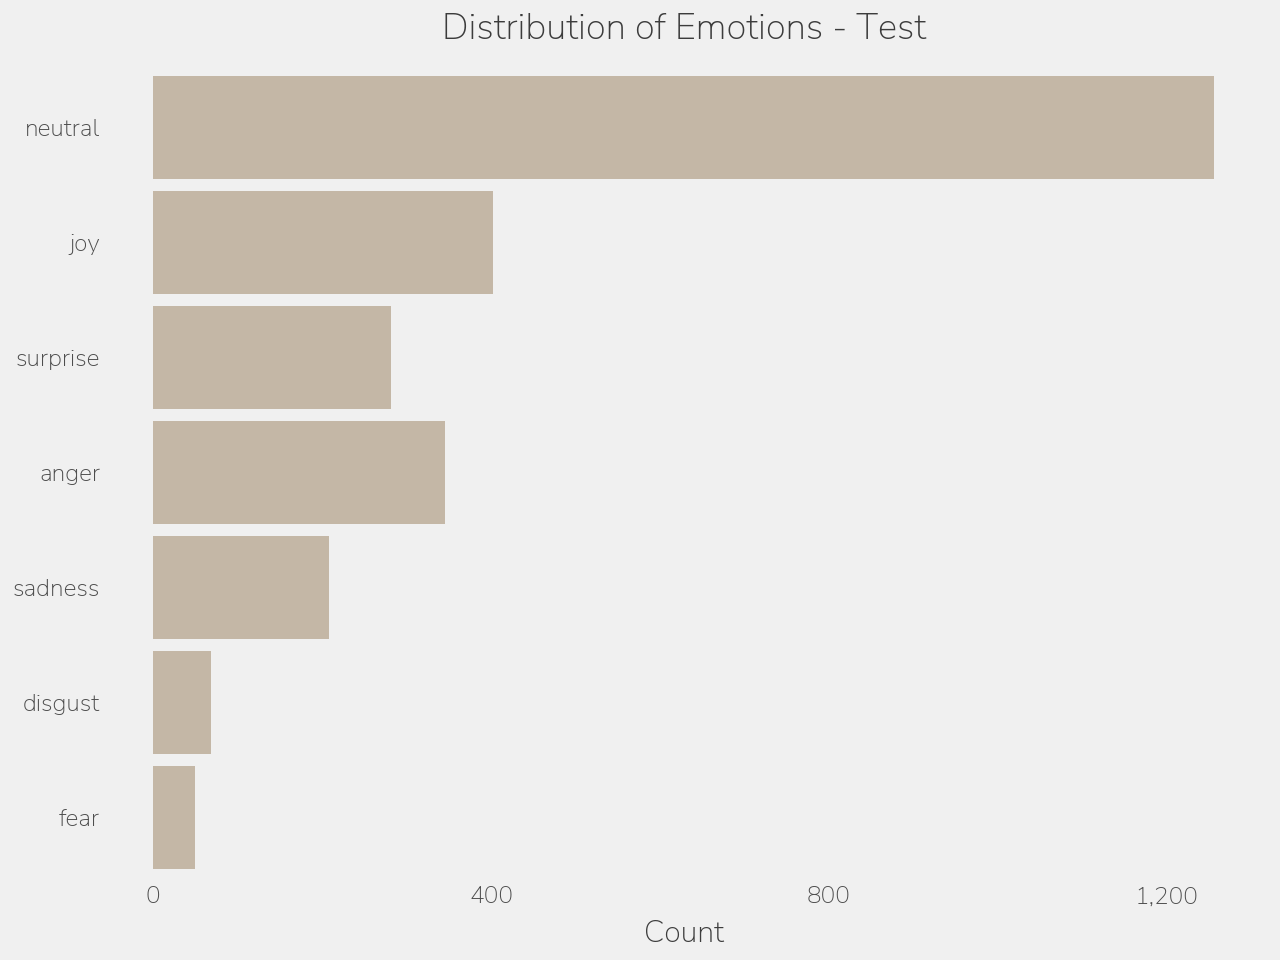

In [32]:
df_plot = df_test.group_by('Emotion').agg(pl.len().alias('Count')).sort(by='Count', descending=False)

(
  ggplot(
    df_plot.with_columns(pl.col('Emotion').cast(dtype)), aes('Emotion', 'Count')) +
  geom_col(fill='#C4B7A6') +
  scale_y_continuous(labels=comma_format()) +
  labs(title='Distribution of Emotions - Test', x='') +
  coord_flip()
)

# Number of records

* Train, Dev, Test combined has 13,708 records

In [114]:
df.describe()

statistic,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
str,f64,str,str,str,str,f64,f64,f64,f64,str,str
"""count""",13708.0,"""13708""","""13708""","""13708""","""13708""",13708.0,13708.0,13708.0,13708.0,"""13708""","""13708"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",4145.282536,null,null,null,null,414.814634,6.082215,4.855632,12.602568,null,null
"""std""",3196.348091,null,null,null,null,319.233845,4.949474,2.362731,7.278134,null,null
"""min""",1.0,"""!""","""1st Customer""","""anger""","""negative""",0.0,0.0,1.0,1.0,"""00:00:02,377""","""00:00:03,836"""
"""25%""",1221.0,null,null,null,null,125.0,2.0,3.0,6.0,null,null
"""50%""",3310.0,null,null,null,null,331.0,5.0,5.0,12.0,null,null
"""75%""",6933.0,null,null,null,null,680.0,9.0,7.0,19.0,null,null
"""max""",10478.0,"""“Good-bye Phoebe and Ursula. I…","""an""","""surprise""","""positive""",1038.0,32.0,9.0,25.0,"""0:46:26,742""","""0:46:27,032"""


In [115]:
df.head()

Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
i64,str,str,str,str,i64,i64,i64,i64,str,str
1,"""also I was the point person on…","""Chandler""","""neutral""","""neutral""",0,0,8,21,"""00:16:16,059""","""00:16:21,731"""
2,"""You must’ve had your hands ful…","""The Interviewer""","""neutral""","""neutral""",0,1,8,21,"""00:16:21,940""","""00:16:23,442"""
3,"""That I did. That I did.""","""Chandler""","""neutral""","""neutral""",0,2,8,21,"""00:16:23,442""","""00:16:26,389"""
4,"""So let’s talk a little bit abo…","""The Interviewer""","""neutral""","""neutral""",0,3,8,21,"""00:16:26,820""","""00:16:29,572"""
5,"""My duties? All right.""","""Chandler""","""surprise""","""positive""",0,4,8,21,"""00:16:34,452""","""00:16:40,917"""


# Length of Sentences

## Total

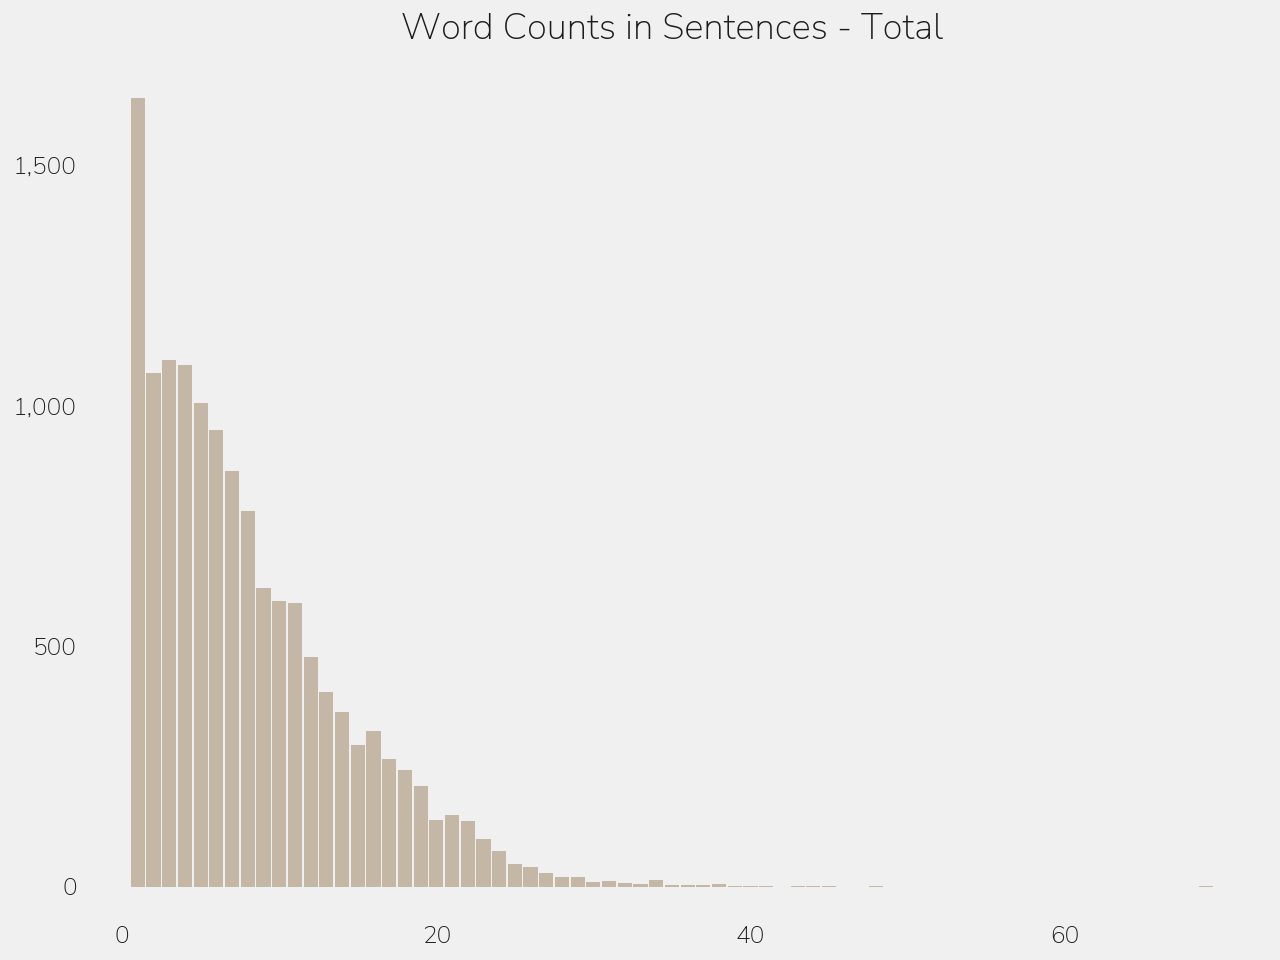

In [52]:
df_plot = (
  df.with_columns(
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.split(' ')
    .list.len()
    .alias('word_count')
  ).group_by('word_count').agg(pl.len().alias('Count')).sort(by='Count', descending=False)
)

(
  ggplot(df_plot, aes('word_count', 'Count')) +
  geom_col(fill='#C4B7A6') +
  scale_y_continuous(labels=comma_format()) +
  labs(title='Word Counts in Sentences - Total', x='', y='')
)

## By Season

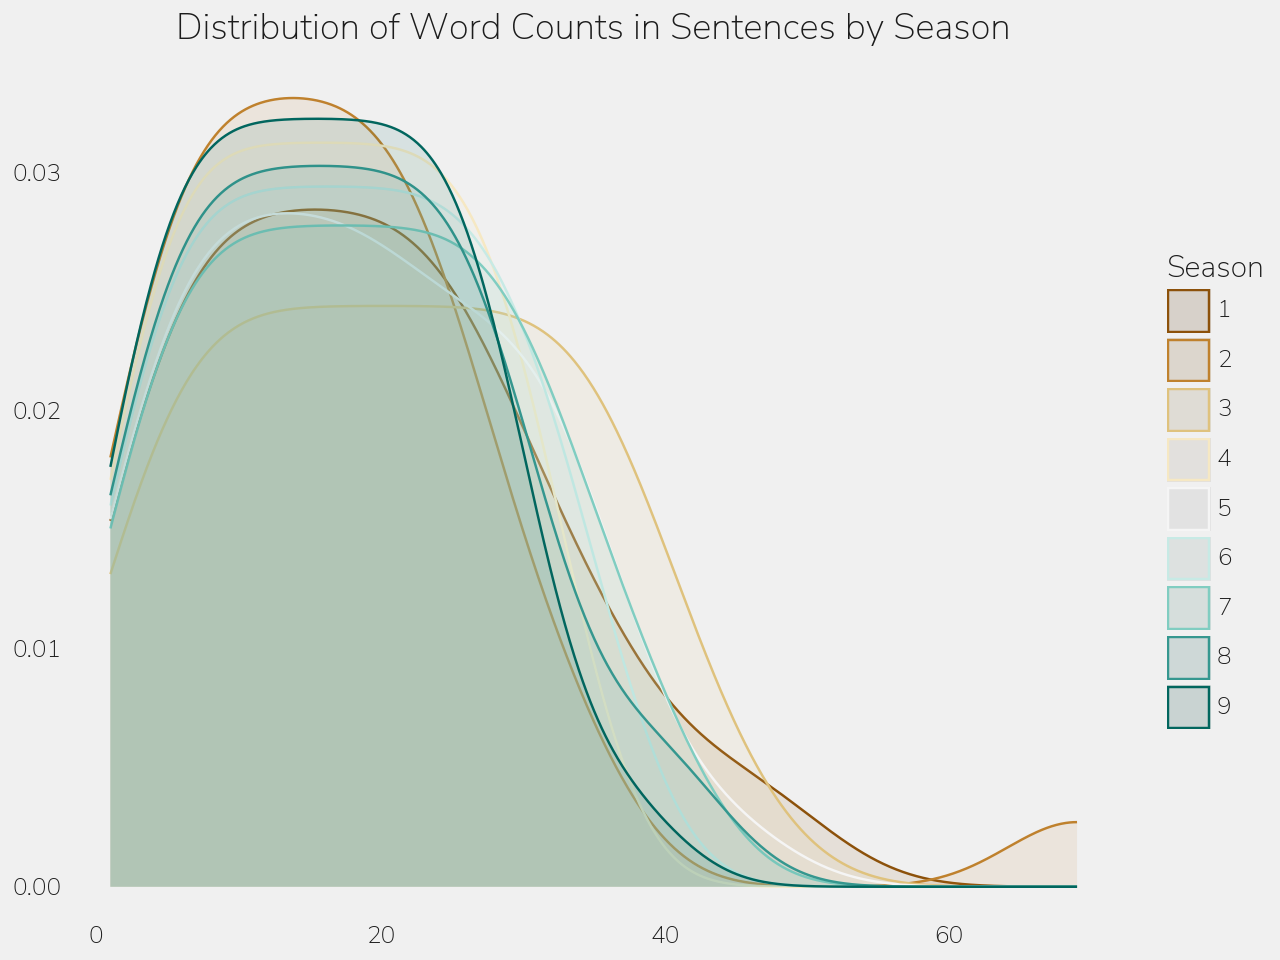

In [73]:
df_plot = (
  df.with_columns(
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.split(' ')
    .list.len()
    .alias('word_count')
  )
  .group_by(['word_count', 'Season']).agg(pl.len().alias('Count')).sort(by='Count', descending=False)
  .with_columns(
    pl.col('Season').cast(pl.Utf8).alias('Season')
  )
)

(
  ggplot(df_plot, aes('word_count', color='Season', fill='Season')) +
  geom_density(alpha=0.1) +
  scale_fill_brewer(type='div') +
  scale_color_brewer(type='div') +
  labs(title='Distribution of Word Counts in Sentences by Season', x='', y='')
)

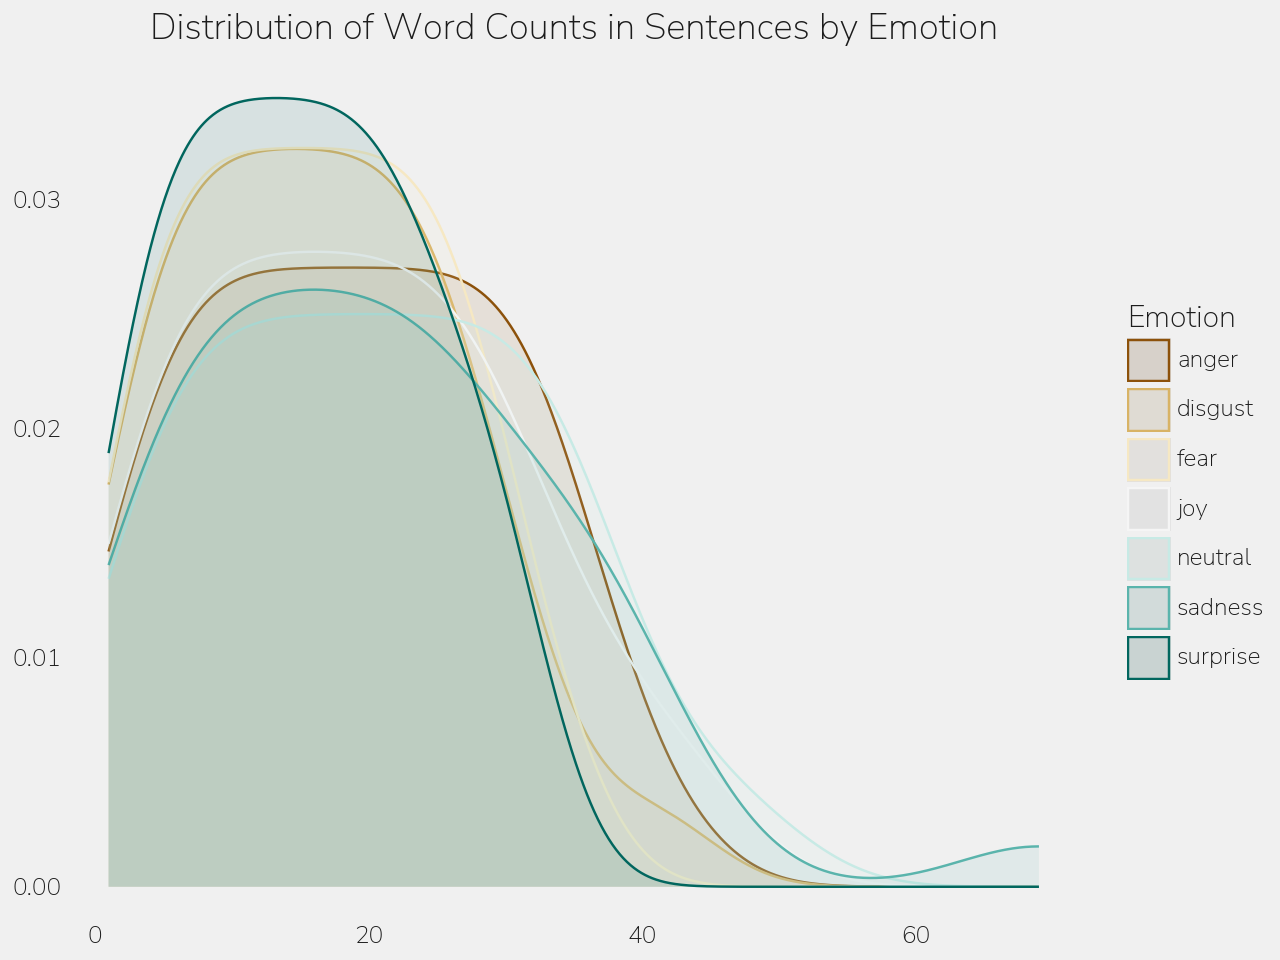

In [74]:
df_plot = (
  df.with_columns(
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.split(' ')
    .list.len()
    .alias('word_count')
  )
  .group_by(['word_count', 'Emotion']).agg(pl.len().alias('Count')).sort(by='Count', descending=False)
)

(
  ggplot(df_plot, aes('word_count', color='Emotion', fill='Emotion')) +
  geom_density(alpha=0.1) +
  scale_fill_brewer(type='div') +
  scale_color_brewer(type='div') +
  labs(title='Distribution of Word Counts in Sentences by Emotion', x='', y='')
)

* Actors speak about 20 words per sentence
* Ross and Rachel speak more sentences that have longer than 20 words 

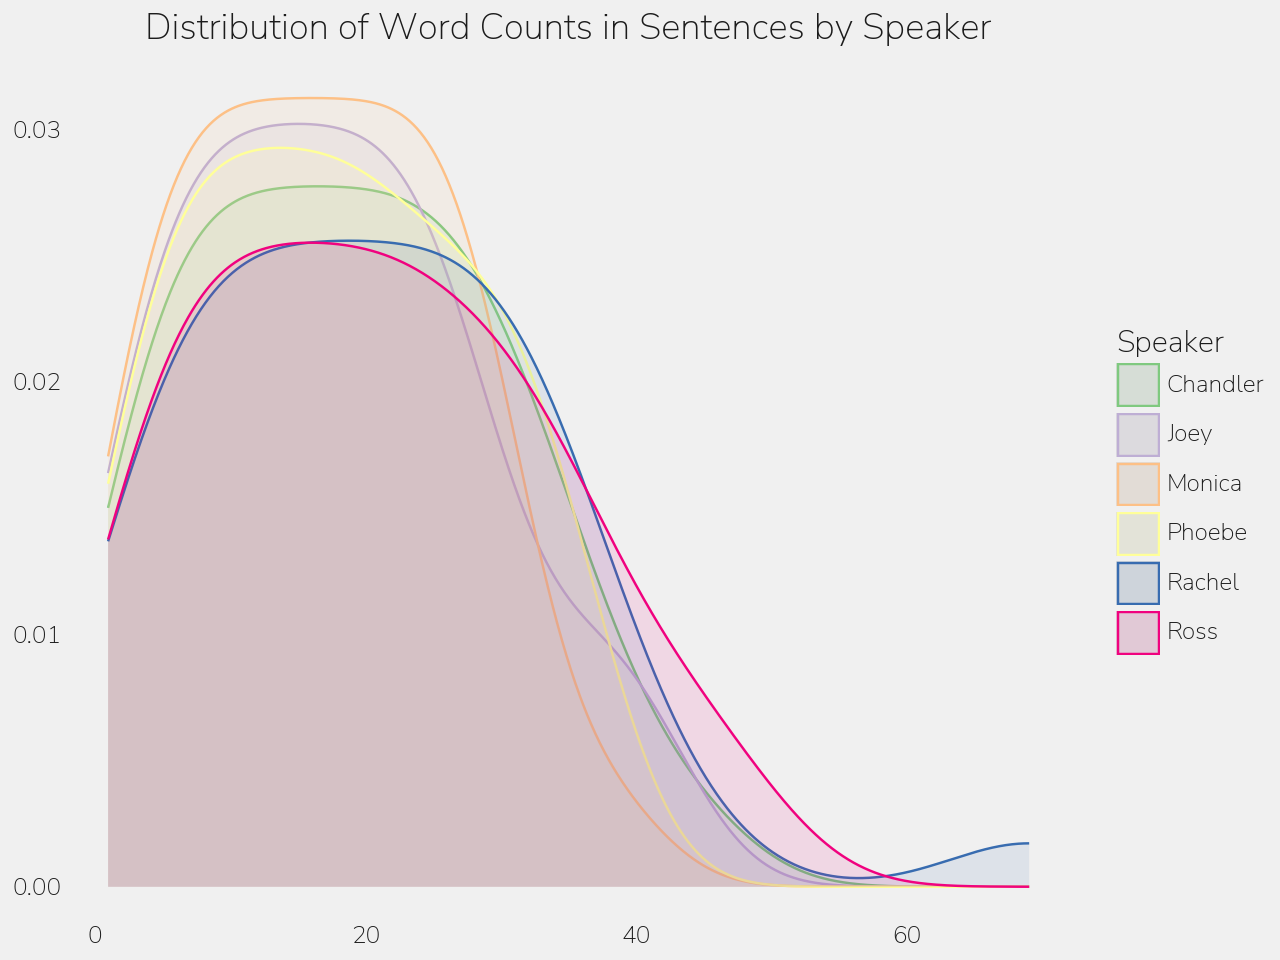

In [77]:
df_plot = (
  df.with_columns(
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.split(' ')
    .list.len()
    .alias('word_count')
  )
  .group_by(['word_count', 'Speaker']).agg(pl.len().alias('Count')).sort(by='Count', descending=False)
  .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
)

(
  ggplot(df_plot, aes('word_count', color='Speaker', fill='Speaker')) +
  geom_density(alpha=0.1) +
  scale_fill_brewer(type='qual') +
  scale_color_brewer(type='qual') +
  labs(title='Distribution of Word Counts in Sentences by Speaker', x='', y='')
)

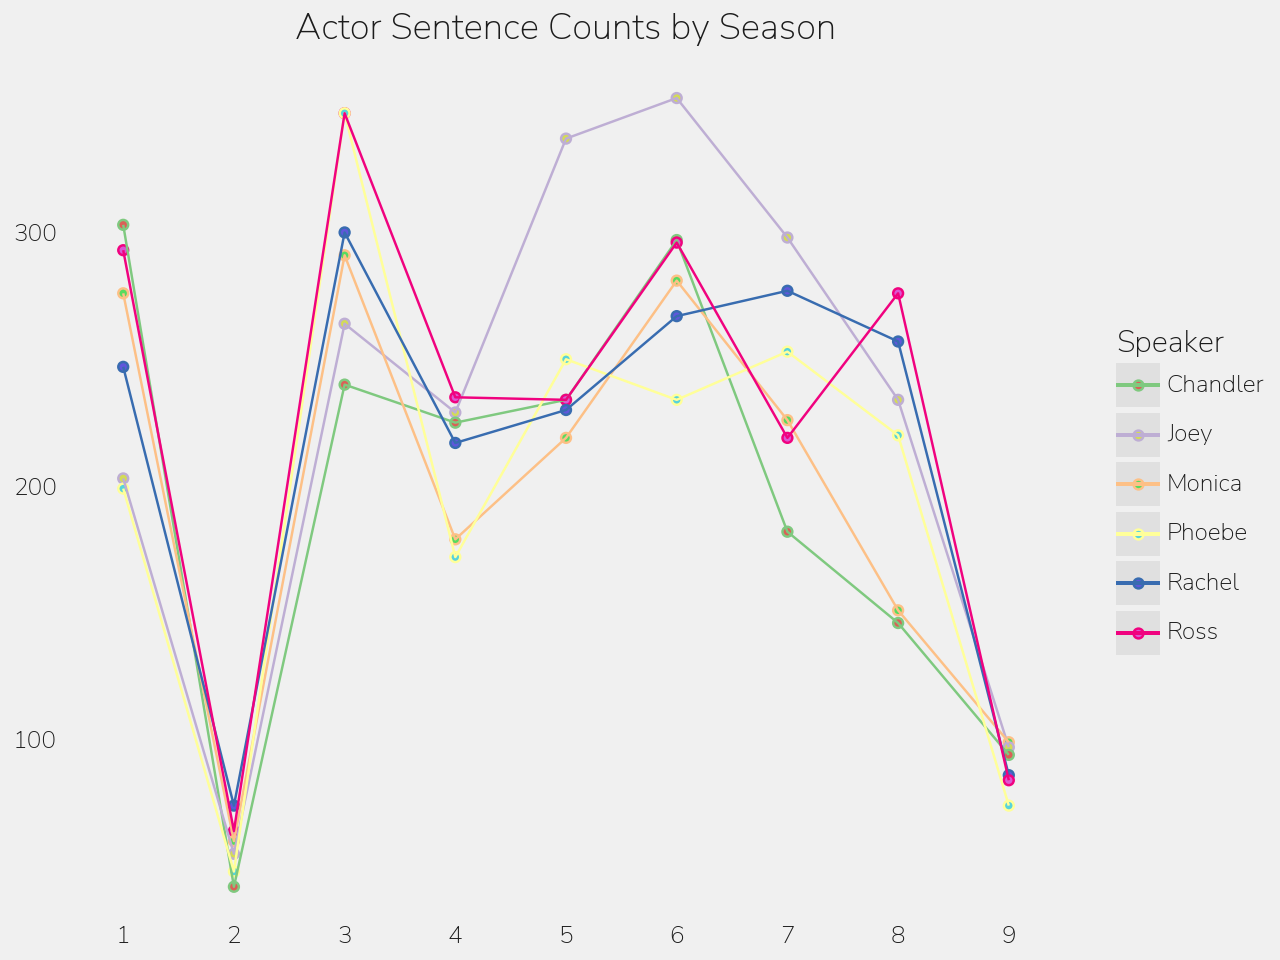

In [236]:
df_plot = (
  df.group_by(['Speaker', 'Season'])
    .agg(pl.len().alias('count'))
    .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
    .sort('count', descending=True)
)

(
  ggplot(df_plot.with_columns(pl.col('Season').cast(pl.Utf8)), 
         aes('Season', 'count', fill='Speaker', color='Speaker', group='Speaker')) +
  geom_point() +
  geom_line() +
  scale_color_brewer(type='qual') +
  labs(title='Actor Sentence Counts by Season', x='', y='')
)

## Get Stopwords

In [111]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
stop_words.update(['oh', 'ok', 'hey', 'im', 'yeah', 'well',
                   'okay', 'like'])

In [92]:
df.filter(pl.col('Speaker') == 'Cookie')

Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
i64,str,str,str,str,i64,i64,i64,i64,str,str
287,"""I’ll do it.""","""Cookie""","""neutral""","""neutral""",24,0,3,11,"""0:19:49,938""","""0:19:51,690"""


In [199]:
(
  df.select(
    pl.col('Speaker'),
    pl.col('Emotion'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
  .group_by(['Speaker', 'Emotion', 'word'])
  .agg(pl.len().alias('freq'))
  .sort(['Emotion', 'freq'], descending=[False, True])
)

Speaker,Emotion,word,freq
str,str,str,u32
"""Rachel""","""anger""","""dont""",27
"""Rachel""","""anger""","""ross""",26
"""Ross""","""anger""","""dont""",21
"""Ross""","""anger""","""get""",21
"""Joey""","""anger""","""dont""",20
…,…,…,…
"""Joey""","""surprise""","""grip""",1
"""Ross""","""surprise""","""little""",1
"""Monica""","""surprise""","""david""",1


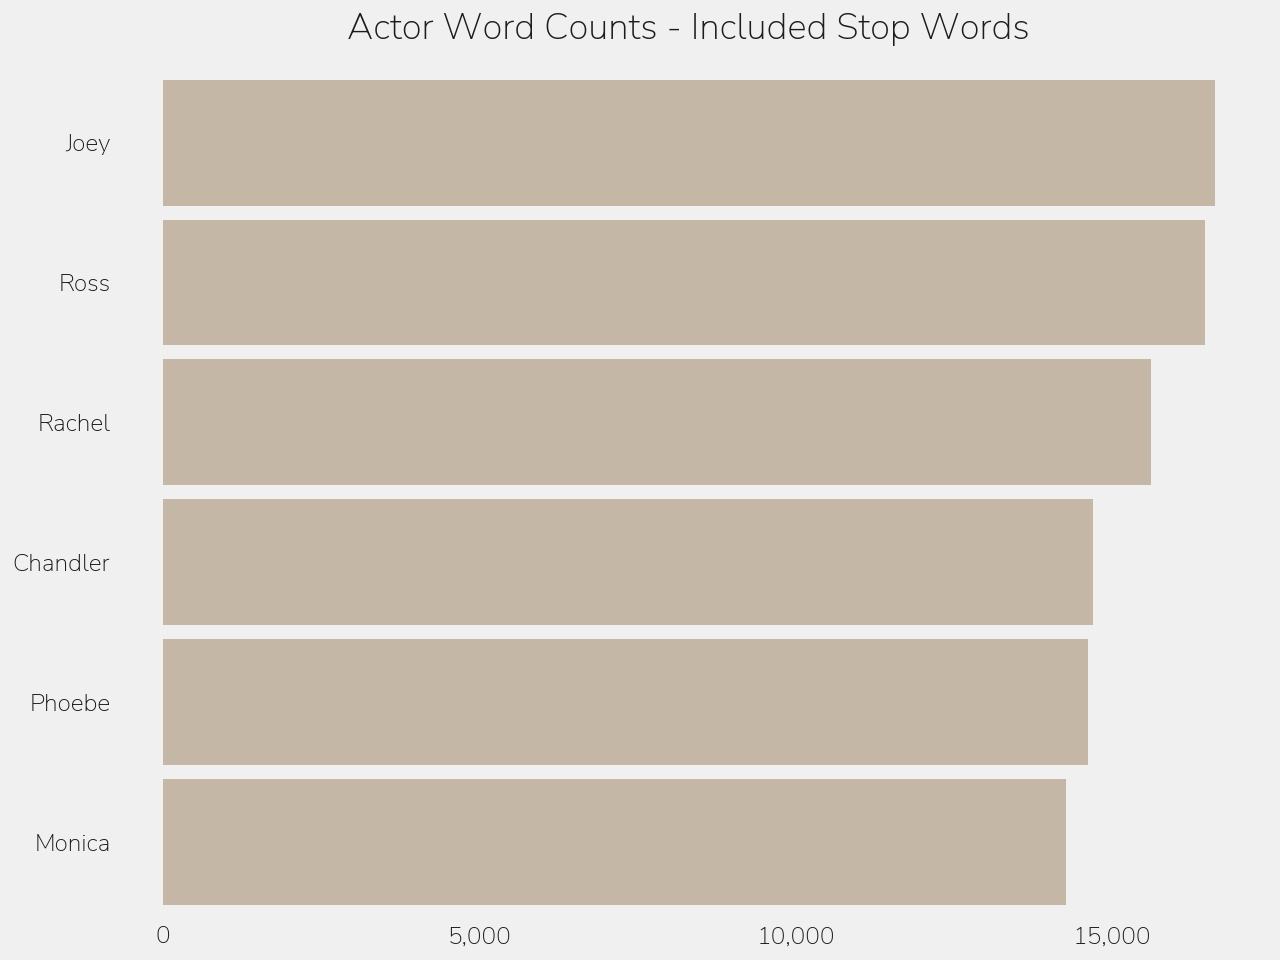

In [249]:
df_plot = (  
  df.select(
    pl.col('Speaker'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .group_by(['Speaker'])
  .agg(pl.len().alias('count'))
  .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
  .sort('count', descending=True)
)

(
  ggplot(df_plot, aes('reorder(Speaker, count)', 'count')) +
  geom_col(fill='#C4B7A6') +
  scale_y_continuous(labels=comma_format()) +
  coord_flip() +
  labs(title='Actor Word Counts - Included Stop Words', x='', y='')
)

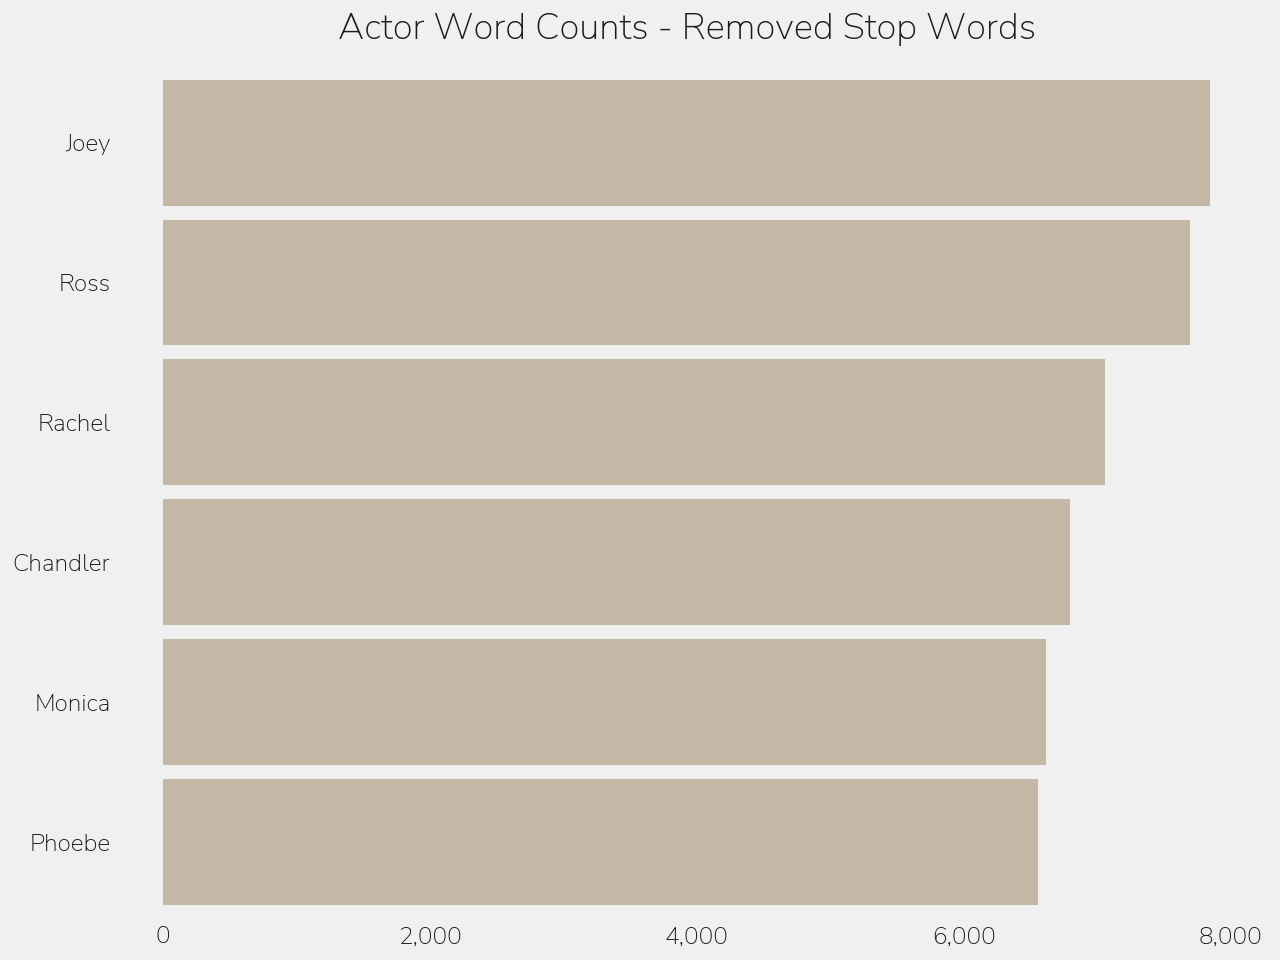

In [250]:
df_plot = (  
  df.select(
    pl.col('Speaker'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .group_by(['Speaker'])
  .agg(pl.len().alias('count'))
  .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
  .sort('count', descending=True)
)

(
  ggplot(df_plot, aes('reorder(Speaker, count)', 'count')) +
  geom_col(fill='#C4B7A6') +
  scale_y_continuous(labels=comma_format()) +
  coord_flip() +
  labs(title='Actor Word Counts - Removed Stop Words', x='', y='')
)

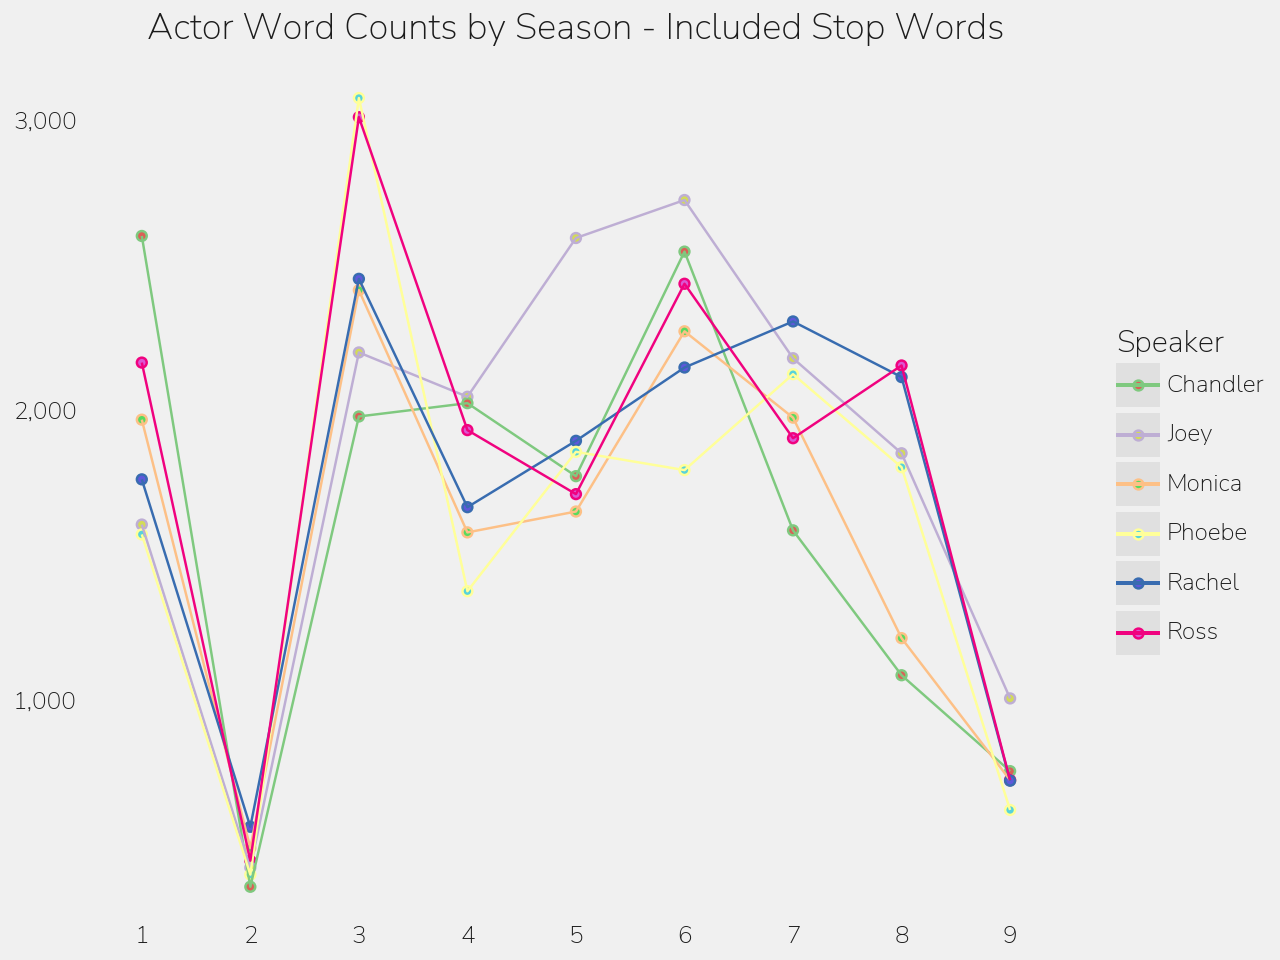

In [240]:
df_plot = (  
  df.select(
    pl.col('Speaker'),
    pl.col('Season'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .group_by(['Speaker', 'Season'])
  .agg(pl.len().alias('count'))
  .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
  .sort('count', descending=True)
)

(
  ggplot(df_plot.with_columns(pl.col('Season').cast(pl.Utf8)), 
         aes('Season', 'count', fill='Speaker', color='Speaker', group='Speaker')) +
  geom_point() +
  geom_line() +
  scale_color_brewer(type='qual') +
  scale_y_continuous(labels=comma_format()) +
  labs(title='Actor Word Counts by Season - Included Stop Words', x='', y='')
)

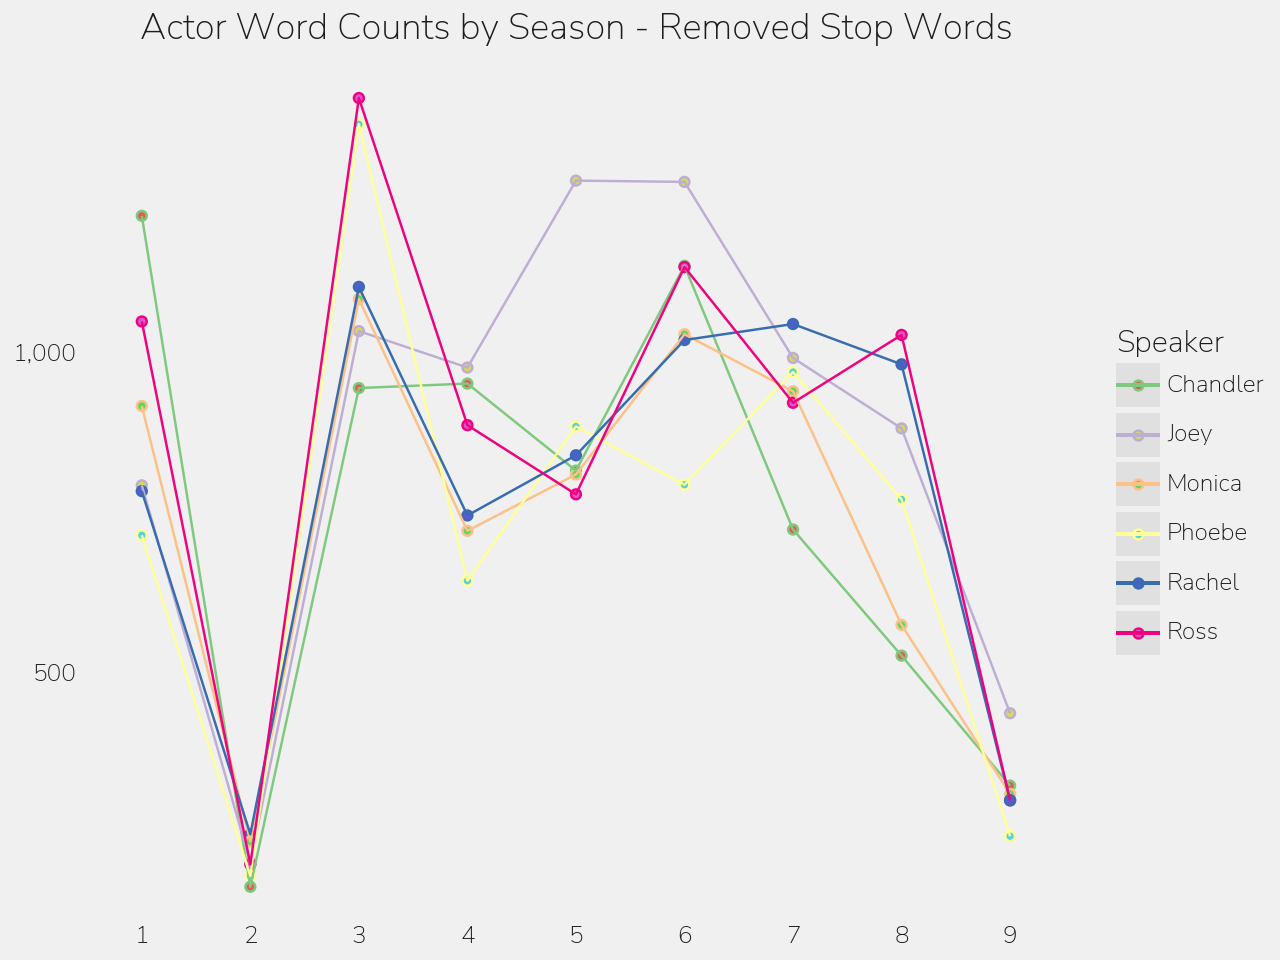

In [239]:
df_plot = (  
  df.select(
    pl.col('Speaker'),
    pl.col('Season'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .group_by(['Speaker', 'Season'])
  .agg(pl.len().alias('count'))
  .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
  .sort('count', descending=True)
)

(
  ggplot(df_plot.with_columns(pl.col('Season').cast(pl.Utf8)), 
         aes('Season', 'count', fill='Speaker', color='Speaker', group='Speaker')) +
  geom_point() +
  geom_line() +
  scale_color_brewer(type='qual') +
  scale_y_continuous(labels=comma_format()) +
  labs(title='Actor Word Counts by Season - Removed Stop Words', x='', y='')
)

# Top 10 Words by Emotion and Actor

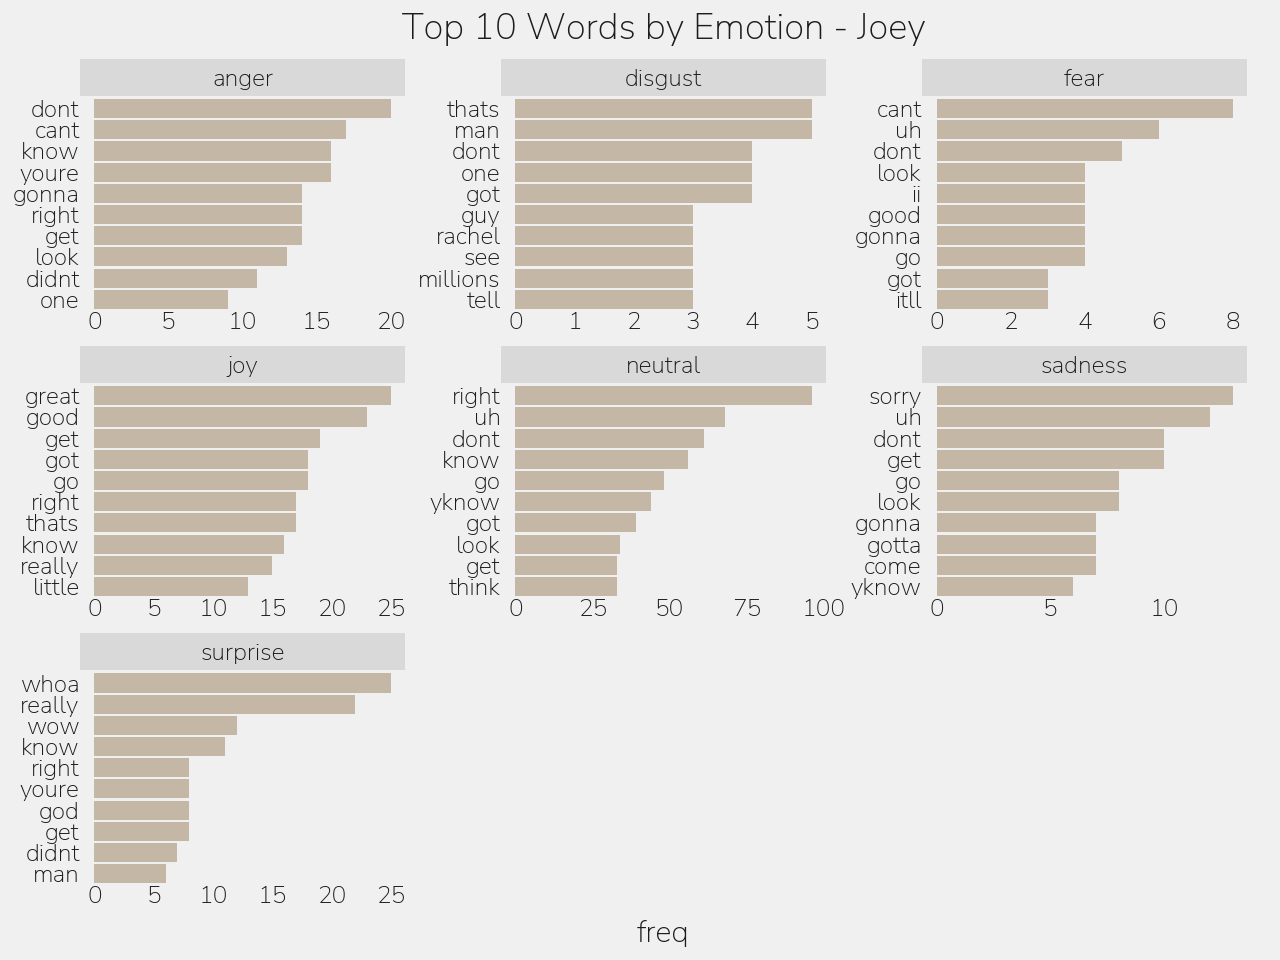

In [201]:
df_plot = (
  df.select(
    pl.col('Speaker'),
    pl.col('Emotion'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .filter(pl.col('Speaker') == 'Joey')
  .group_by(['Speaker', 'Emotion', 'word'])
  .agg(pl.len().alias('freq'))
  .sort('freq', descending=True)
  .group_by('Emotion')
  .head(10)
  .with_columns(
    (pl.col('Emotion').cast(pl.Categorical).to_physical().cast(pl.Utf8) + pl.col('word')).alias('order_var')
  )
)

(
  ggplot(df_plot, aes('reorder(order_var, freq)', 'freq')) +
  geom_col(fill='#C4B7A6') +
  scale_x_discrete(labels=lambda lbls : [s[1:] for s in lbls]) +
  coord_flip() + 
  facet_wrap('Emotion', scales='free') +
  labs(x='', title='Top 10 Words by Emotion - Joey')
)

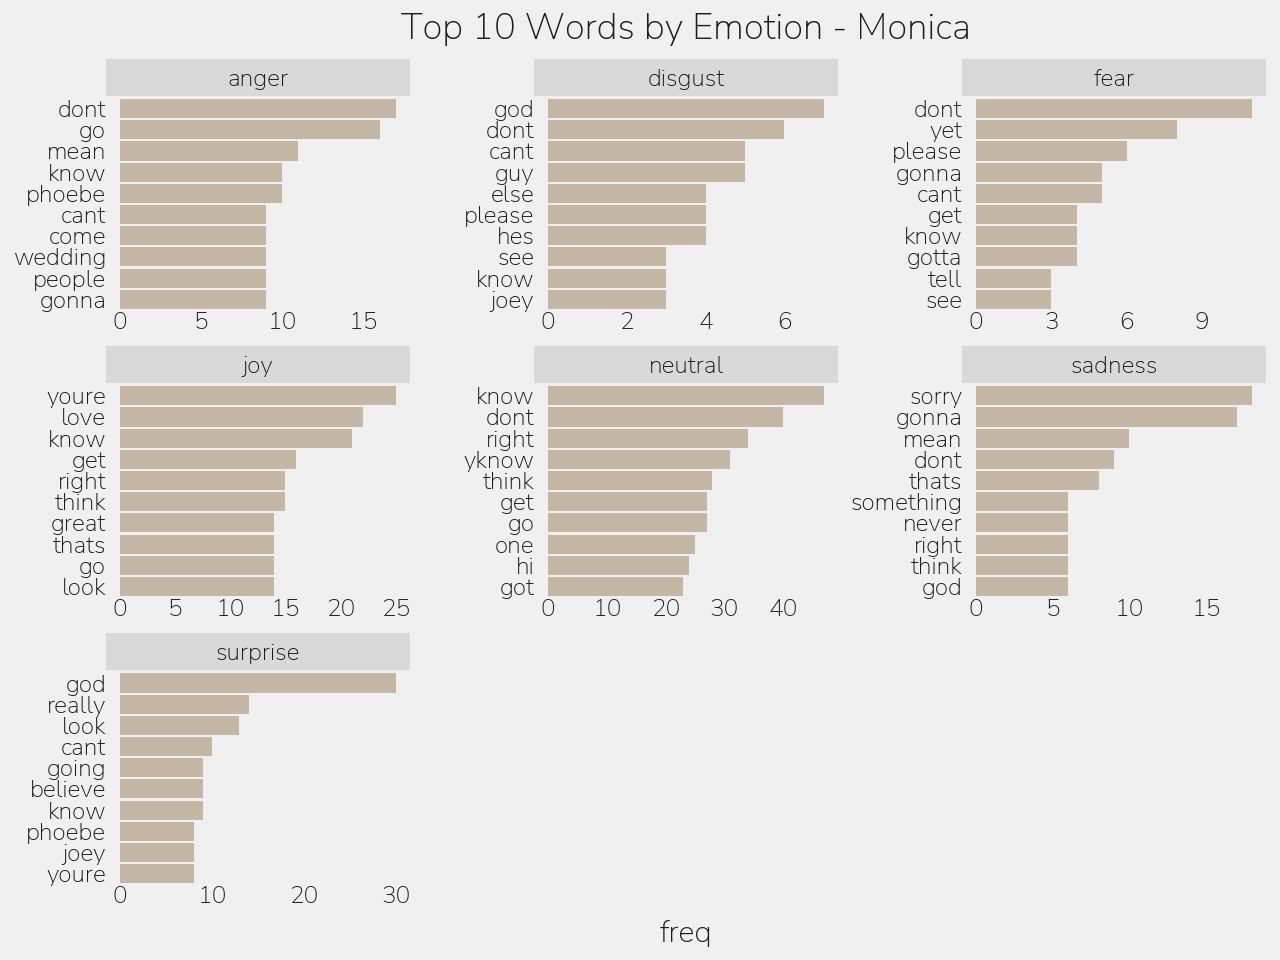

In [202]:
df_plot = (
  df.select(
    pl.col('Speaker'),
    pl.col('Emotion'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .filter(pl.col('Speaker') == 'Monica')
  .group_by(['Speaker', 'Emotion', 'word'])
  .agg(pl.len().alias('freq'))
  .sort('freq', descending=True)
  .group_by('Emotion')
  .head(10)
  .with_columns(
    (pl.col('Emotion').cast(pl.Categorical).to_physical().cast(pl.Utf8) + pl.col('word')).alias('order_var')
  )
)

(
  ggplot(df_plot, aes('reorder(order_var, freq)', 'freq')) +
  geom_col(fill='#C4B7A6') +
  scale_x_discrete(labels=lambda lbls : [s[1:] for s in lbls]) +
  coord_flip() + 
  facet_wrap('Emotion', scales='free') +
  labs(x='', title='Top 10 Words by Emotion - Monica')
)

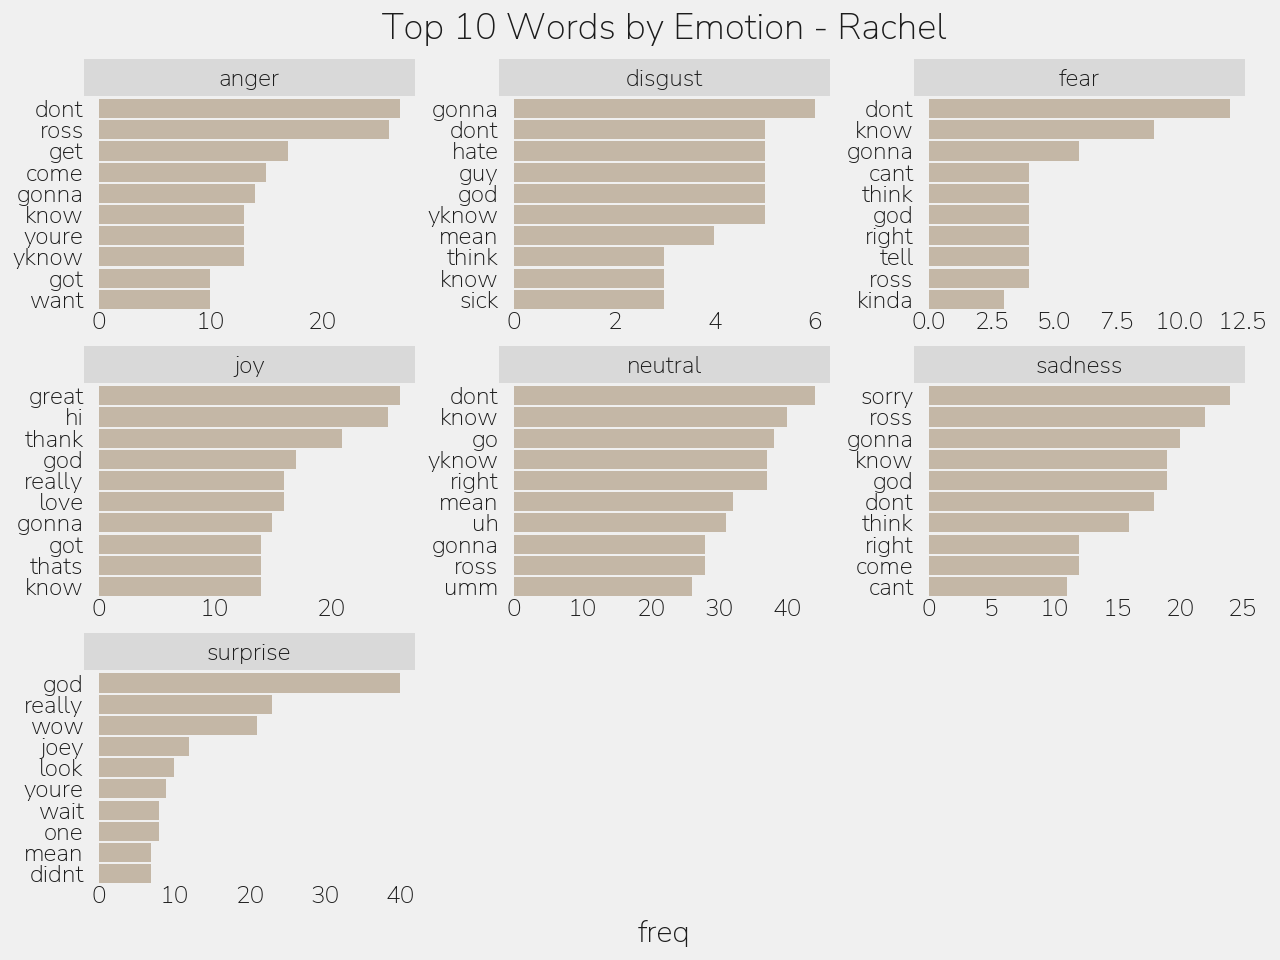

In [203]:
df_plot = (
  df.select(
    pl.col('Speaker'),
    pl.col('Emotion'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .filter(pl.col('Speaker') == 'Rachel')
  .group_by(['Speaker', 'Emotion', 'word'])
  .agg(pl.len().alias('freq'))
  .sort('freq', descending=True)
  .group_by('Emotion')
  .head(10)
  .with_columns(
    (pl.col('Emotion').cast(pl.Categorical).to_physical().cast(pl.Utf8) + pl.col('word')).alias('order_var')
  )
)

(
  ggplot(df_plot, aes('reorder(order_var, freq)', 'freq')) +
  geom_col(fill='#C4B7A6') +
  scale_x_discrete(labels=lambda lbls : [s[1:] for s in lbls]) +
  coord_flip() + 
  facet_wrap('Emotion', scales='free') +
  labs(x='', title='Top 10 Words by Emotion - Rachel')
)

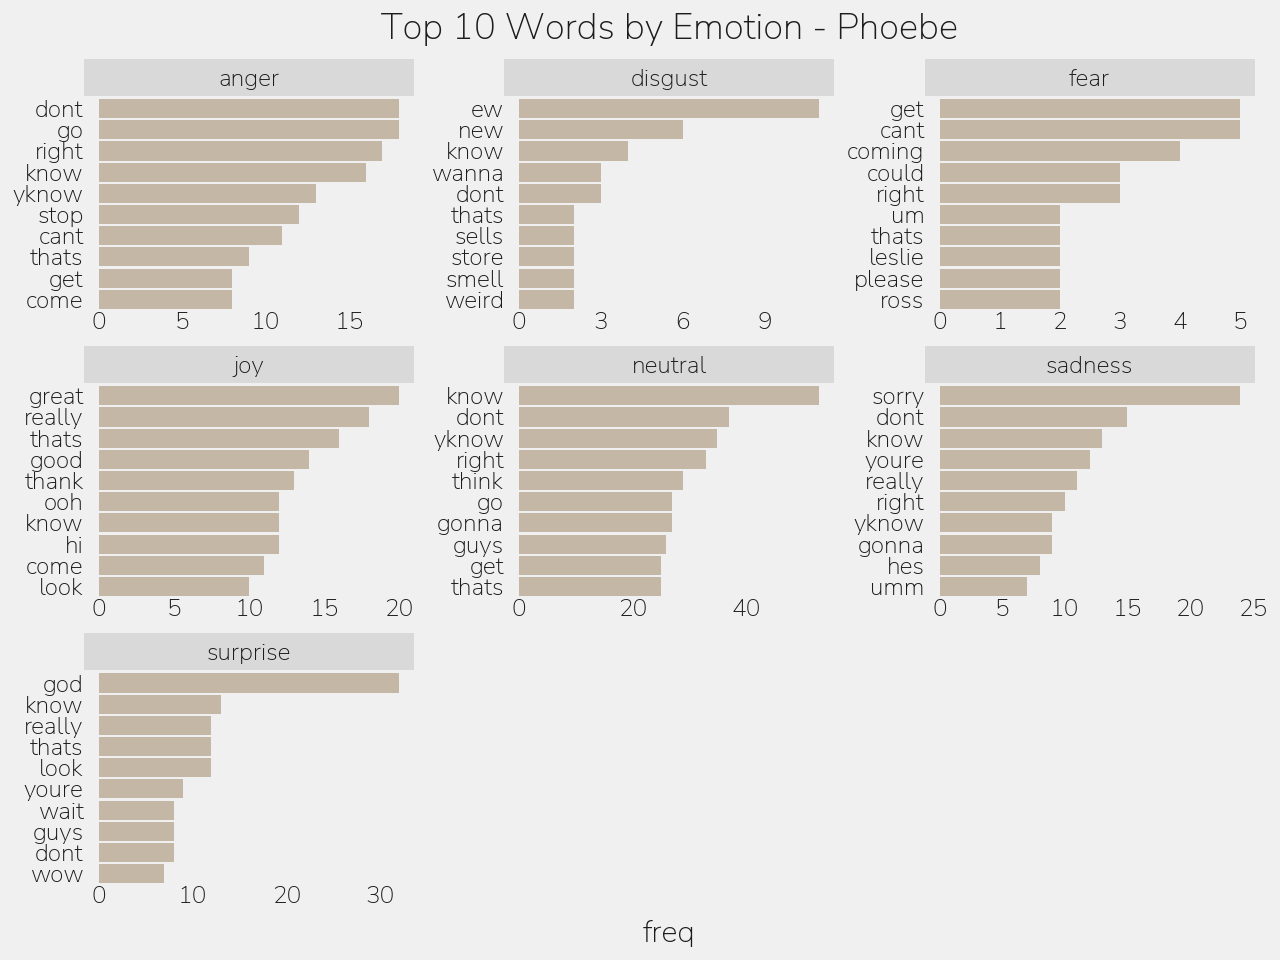

In [204]:
df_plot = (
  df.select(
    pl.col('Speaker'),
    pl.col('Emotion'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .filter(pl.col('Speaker') == 'Phoebe')
  .group_by(['Speaker', 'Emotion', 'word'])
  .agg(pl.len().alias('freq'))
  .sort('freq', descending=True)
  .group_by('Emotion')
  .head(10)
  .with_columns(
    (pl.col('Emotion').cast(pl.Categorical).to_physical().cast(pl.Utf8) + pl.col('word')).alias('order_var')
  )
)

(
  ggplot(df_plot, aes('reorder(order_var, freq)', 'freq')) +
  geom_col(fill='#C4B7A6') +
  scale_x_discrete(labels=lambda lbls : [s[1:] for s in lbls]) +
  coord_flip() + 
  facet_wrap('Emotion', scales='free') +
  labs(x='', title='Top 10 Words by Emotion - Phoebe')
)

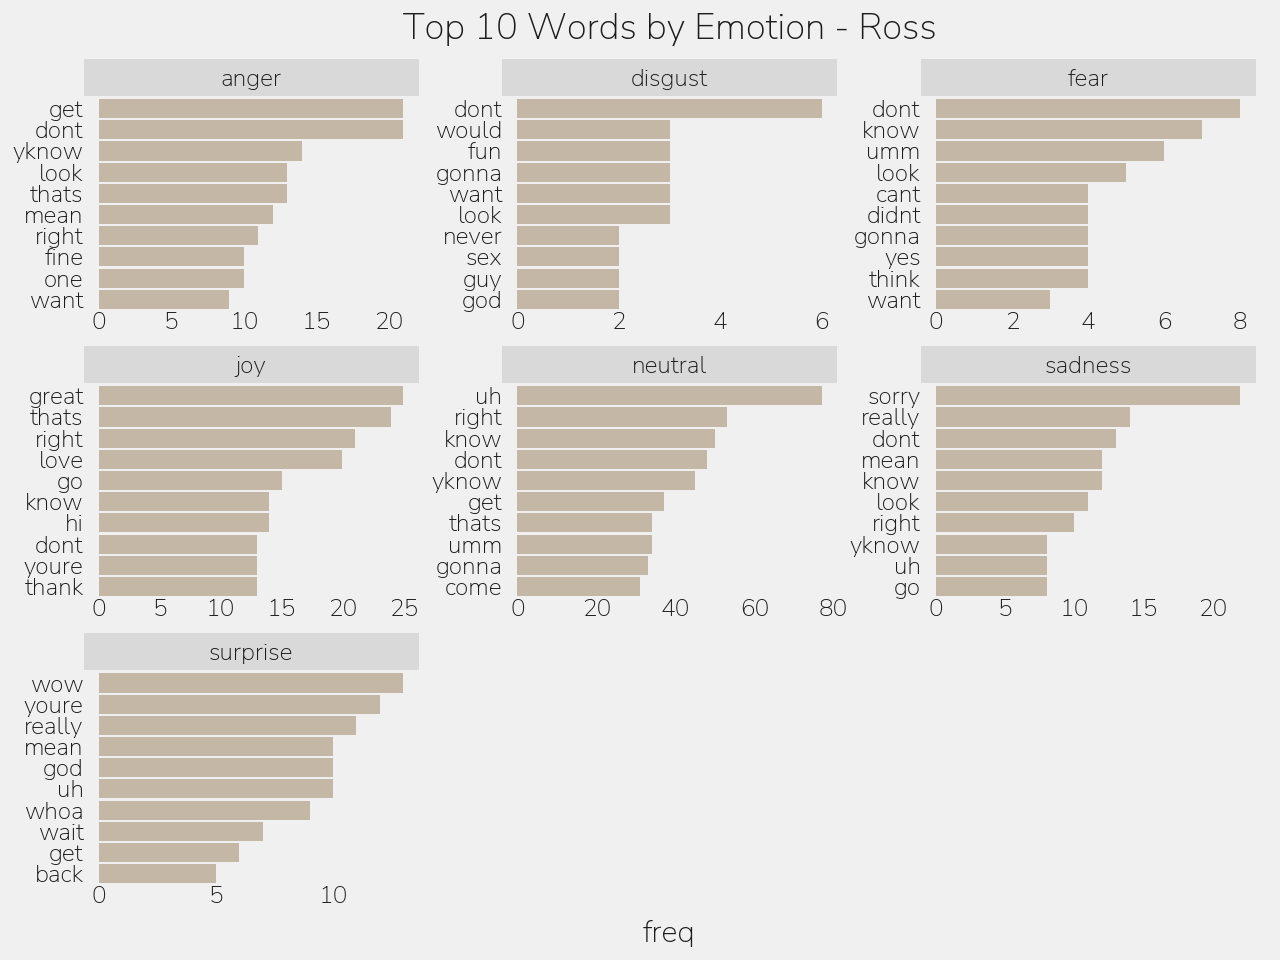

In [205]:
df_plot = (
  df.select(
    pl.col('Speaker'),
    pl.col('Emotion'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .filter(pl.col('Speaker') == 'Ross')
  .group_by(['Speaker', 'Emotion', 'word'])
  .agg(pl.len().alias('freq'))
  .sort('freq', descending=True)
  .group_by('Emotion')
  .head(10)
  .with_columns(
    (pl.col('Emotion').cast(pl.Categorical).to_physical().cast(pl.Utf8) + pl.col('word')).alias('order_var')
  )
)

(
  ggplot(df_plot, aes('reorder(order_var, freq)', 'freq')) +
  geom_col(fill='#C4B7A6') +
  scale_x_discrete(labels=lambda lbls : [s[1:] for s in lbls]) +
  coord_flip() + 
  facet_wrap('Emotion', scales='free') +
  labs(x='', title='Top 10 Words by Emotion - Ross')
)

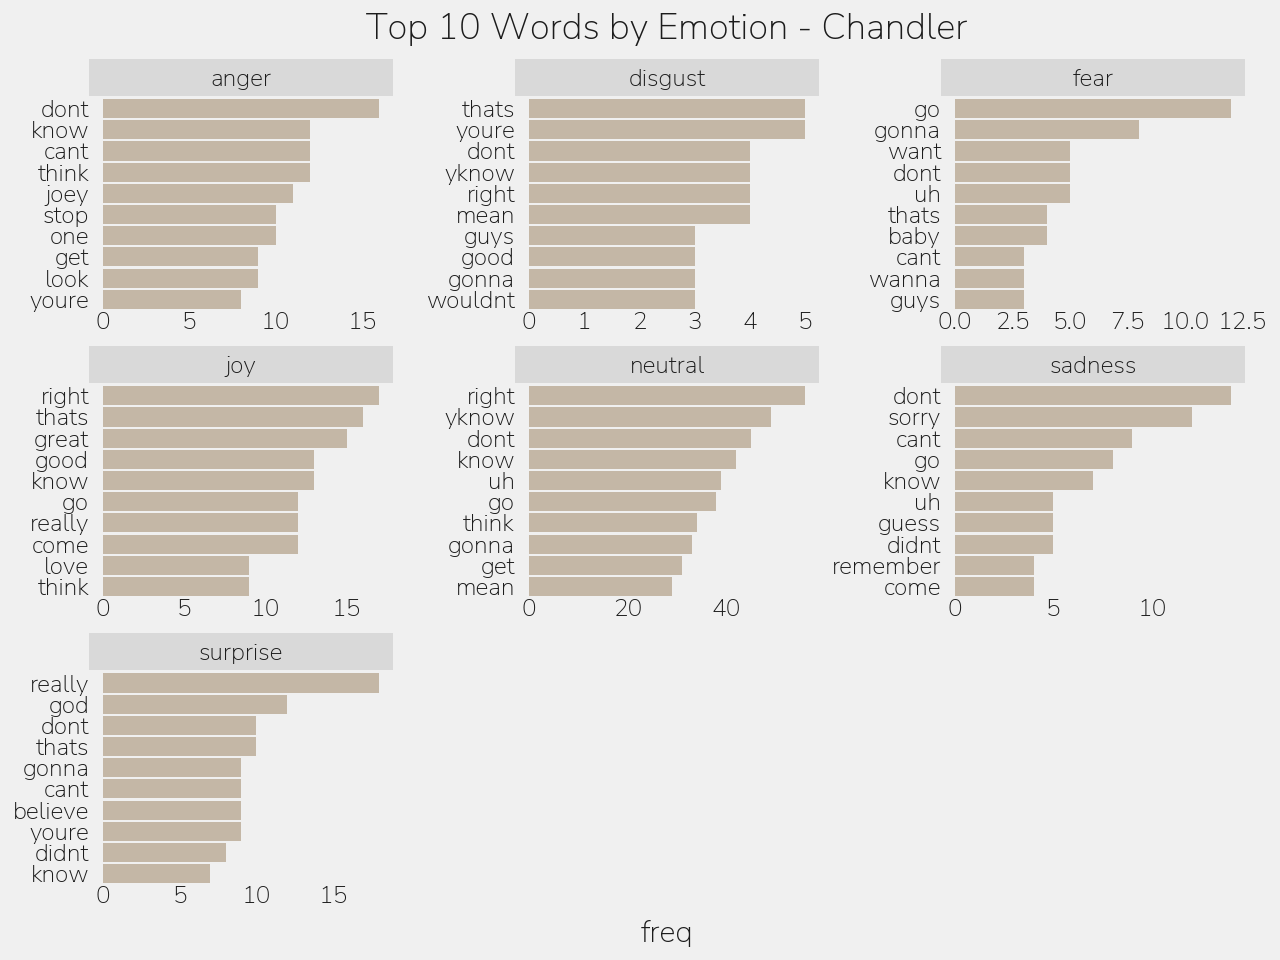

In [206]:
df_plot = (
  df.select(
    pl.col('Speaker'),
    pl.col('Emotion'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('word') != '')
  .filter(pl.col('Speaker') == 'Chandler')
  .group_by(['Speaker', 'Emotion', 'word'])
  .agg(pl.len().alias('freq'))
  .sort('freq', descending=True)
  .group_by('Emotion')
  .head(10)
  .with_columns(
    (pl.col('Emotion').cast(pl.Categorical).to_physical().cast(pl.Utf8) + pl.col('word')).alias('order_var')
  )
)

(
  ggplot(df_plot, aes('reorder(order_var, freq)', 'freq')) +
  geom_col(fill='#C4B7A6') +
  scale_x_discrete(labels=lambda lbls : [s[1:] for s in lbls]) +
  coord_flip() + 
  facet_wrap('Emotion', scales='free') +
  labs(x='', title='Top 10 Words by Emotion - Chandler')
)

# TF-IDF

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
  max_features=1000,
  lowercase=True,
  stop_words=list(stop_words)
)

tfidf_matrix = tfidf.fit_transform(df['Utterance'])
print(f'TF-IDF shape: {tfidf_matrix.shape}')

TF-IDF shape: (13708, 1000)


In [208]:
feature_names = tfidf.get_feature_names_out()

dense_matrix = tfidf_matrix.todense()

tfidf_df = pl.DataFrame(np.asarray(dense_matrix))

tfidf_df = tfidf_df.with_columns(
  df['Emotion'].alias('Emotion')
)

In [209]:
tfidf_df = tfidf_df.rename(
  dict(zip(tfidf_df.columns, feature_names))
)

In [210]:
tfidf_df

10,30,50,able,absolutely,across,acting,actor,actual,actually,afraid,age,ago,ah,ahh,alan,allowed,almost,alone,along,already,alright,also,although,always,amazing,angela,another,answer,anybody,anymore,anyone,anything,anyway,anywhere,apartment,apologize,…,wine,wish,without,woman,women,wonder,wonderful,wondering,woo,word,words,work,worked,working,works,world,worried,worry,worse,worst,worth,would,wow,write,writing,wrong,wrote,ya,yay,years,yemen,yep,yes,yesterday,yet,york,Emotion
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""neutral"""
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""neutral"""
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""neutral"""
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""neutral"""
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""surprise"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""neutral"""
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""surprise"""
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""neutral"""


In [211]:
tfidf_by_emotion = (
  tfidf_df
  .group_by('Emotion')
  .agg(pl.col('*').exclude('Emotion').sum())
)

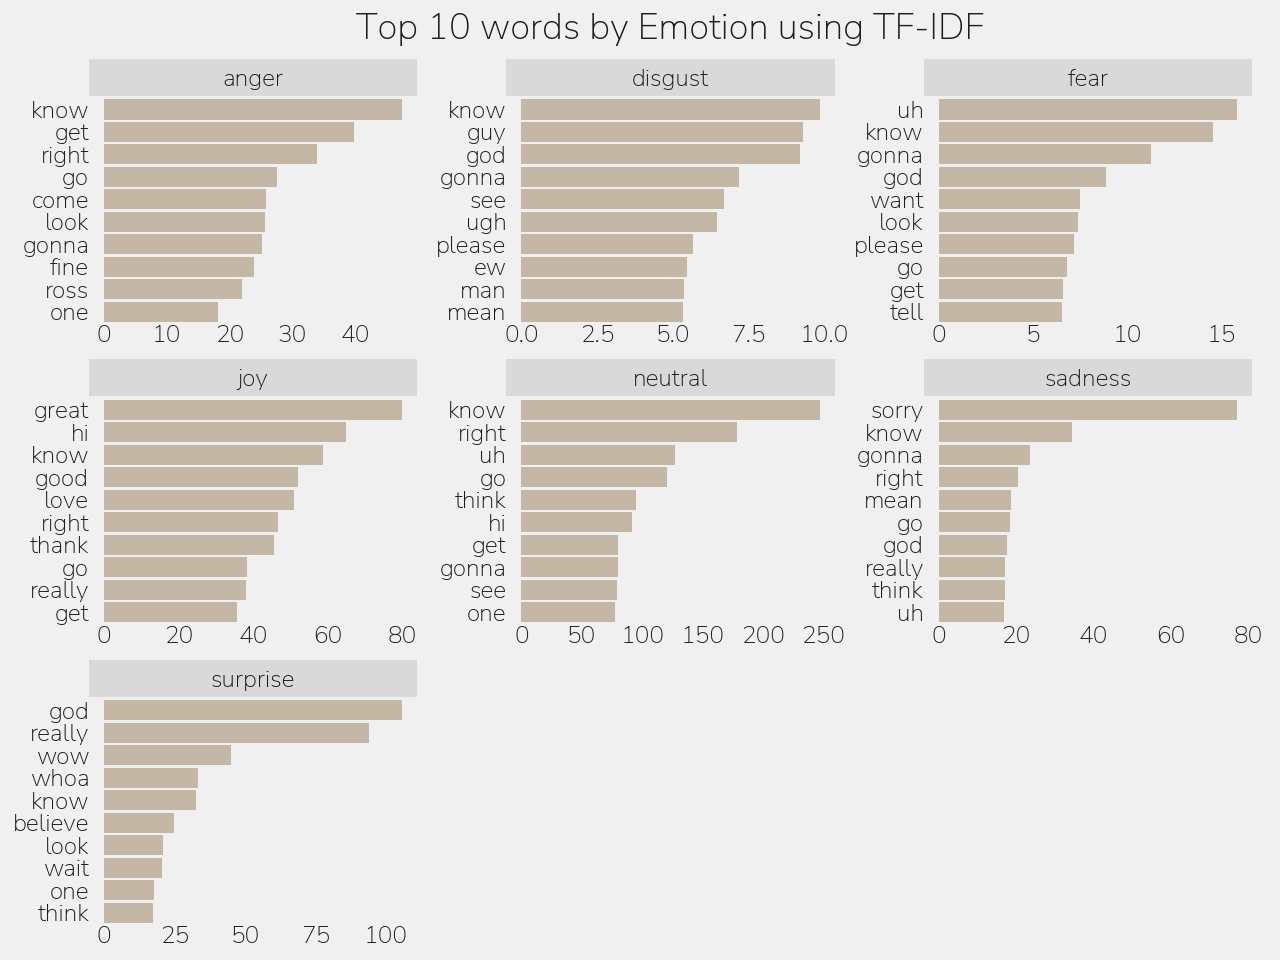

In [212]:
df_plot = (
  tfidf_by_emotion.unpivot(index='Emotion', variable_name='word')
  .sort(by=['Emotion', 'value'], descending=True)
  .group_by('Emotion')
  .head(10)
  .with_columns(
    (pl.col('Emotion').cast(pl.Categorical).to_physical().cast(pl.Utf8) + pl.col('word')).alias('order_var')
  )
)

(
  ggplot(df_plot, aes('reorder(order_var, value)', 'value')) +
  geom_col(fill='#C4B7A6') +
  scale_x_discrete(labels=lambda lbls : [s[1:] for s in lbls]) +
  coord_flip() +
  facet_wrap('Emotion', scales='free') +
  labs(title='Top 10 words by Emotion using TF-IDF', y='', x='')
)

# Cosine Similarity

In [214]:
tfidf_by_emotion

Emotion,10,30,50,able,absolutely,across,acting,actor,actual,actually,afraid,age,ago,ah,ahh,alan,allowed,almost,alone,along,already,alright,also,although,always,amazing,angela,another,answer,anybody,anymore,anyone,anything,anyway,anywhere,apartment,…,window,wine,wish,without,woman,women,wonder,wonderful,wondering,woo,word,words,work,worked,working,works,world,worried,worry,worse,worst,worth,would,wow,write,writing,wrong,wrote,ya,yay,years,yemen,yep,yes,yesterday,yet,york
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""disgust""",0.788292,0.0,0.0,0.0,0.607668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.438559,0.857463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.834112,0.223677,0.0,2.095028,0.0,0.446255,0.95297,0.0,0.365435,0.0,0.782706,1.661355,0.486981,0.0,0.937725,…,0.0,0.0,0.753542,0.0,1.419979,3.11618,0.626615,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.512932,0.0,0.0,0.659434,0.0,2.0,0.0,0.0,4.656928,0.0,0.0,0.0,2.879703,0.0,0.676965,0.0,2.101216,0.0,0.0,0.549563,0.0,0.764817,0.0
"""neutral""",3.150528,5.438546,2.991374,4.929689,7.603396,2.115251,2.723797,5.290193,3.231891,30.982877,6.45434,1.0,2.460467,37.737451,7.568442,2.875687,2.712421,3.22838,7.072809,2.55885,4.769758,13.401089,9.414302,5.969765,15.817402,1.031539,1.370654,13.321463,7.162369,7.604614,7.096368,9.281556,20.039705,14.69106,2.404891,11.039175,…,2.74423,1.175991,5.360665,4.200366,12.690665,10.614016,1.98519,0.0,6.211613,0.0,2.970342,2.116935,22.961396,1.148542,5.295158,3.216204,4.176138,1.225317,13.942395,0.772927,1.038397,3.869447,53.741007,0.760946,5.536197,1.998438,10.589068,4.594898,26.212319,0.0,10.392656,2.115977,4.423186,56.013621,3.809144,12.562443,2.291714
"""surprise""",0.0,0.683778,0.0,0.981933,0.795196,0.0,0.0,0.389104,0.0,4.892487,0.0,2.484856,1.085211,5.417249,3.93869,0.0,0.741773,0.414044,1.097882,0.0,1.4071,0.0,0.602955,0.0,1.036257,0.429892,0.834819,1.262396,0.0,0.481207,1.227324,1.356084,2.712445,0.616991,0.0,2.464113,…,2.941009,0.657829,1.462323,2.581603,3.267011,2.857227,1.197615,0.0,0.0,0.0,3.74901,0.500113,2.925083,2.544581,1.684921,0.0,0.601278,0.0,0.0,0.0,0.0,0.0,8.391797,45.06387,1.224989,0.0,1.764499,0.0,3.577583,0.0,1.067754,0.879624,0.0,7.075972,0.0,2.617452,0.0
"""anger""",0.50554,1.210948,0.0,1.470282,0.528803,0.855787,0.0,0.0,0.550149,3.856826,1.287174,0.70394,0.844128,7.267448,0.817816,0.0,1.230821,2.074858,2.694358,1.851991,2.235046,2.345414,0.862249,0.545723,6.214113,0.0,0.551746,3.085143,1.000493,2.040693,4.742416,1.281912,5.366136,0.933938,0.457652,2.693923,…,0.443809,0.618365,1.498764,2.072831,6.813859,0.286666,0.379576,0.0,0.632689,0.913865,1.858076,1.073711,2.564618,0.910455,1.756122,0.509877,3.491362,0.566745,0.0,0.844957,1.707622,0.0,16.337094,1.06845,1.332673,0.0,4.75654,0.817714,1.885141,0.0,1.262852,0.778434,0.0,11.953641,0.0,2.883252,0.903934
"""fear""",0.0,0.0,0.0,0.403191,0.0,0.0,0.633635,0.304187,0.0,1.633211,0.0,0.0,0.877783,2.742868,0.0,0.0,0.0,0.0,0.0,0.0,0.429069,1.295864,0.559245,0.0,0.32026,0.0,0.62414,1.652565,0.0,0.893728,0.0,0.590635,2.989778,0.0,1.051551,0.731801,…,0.0,0.0,0.0,0.947363,1.231121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.082893,0.0,0.0,0.0,0.48692,1.758731,0.0,0.0,0.0,0.0,1.903578,0.456556,0.0,0.0,1.637104,1.0,0.525236,0.0,0.0,0.0,0.0,3.065612,0.0,2.618594,0.0
"""joy""",1.312994,0.812869,0.803245,1.699317,9.074582,0.362886,1.194975,2.017935,0.0,6.714763,0.0,1.173974,2.091292,8.455381,3.407191,3.223607,0.0,1.922019,0.408302,2.034757,4.924461,2.551961,4.366016,1.032218,5.853381,15.368197,0.0,2.514631,1.511534,0.916262,0.494695,2.823527,7.077449,3.338936,0.0,2.396138,…,0.0,1.694047,3.8039,2.337858,2.440421,1.573957,1.014097,6.189301,0.34161,4.910372,0.473616,0.0,9.722776,0.0,1.66031,1.482051,4.32878,0.0,0.354247,0.527135,0.0,0.431907,14.964271,16.2386,2.253344,1.325077,3.395977,1.055778,12.380

In [218]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(
  tfidf_by_emotion.select(pl.col('*').exclude('Emotion'))
)

cosine_sim_df = pl.DataFrame(cosine_sim)

In [226]:
cosine_sim_df = cosine_sim_df.rename(
  dict(zip(cosine_sim_df.columns, tfidf_by_emotion['Emotion']))
)

cosine_sim_df = cosine_sim_df.with_columns(
  tfidf_by_emotion['Emotion'].alias('Emotion')
)

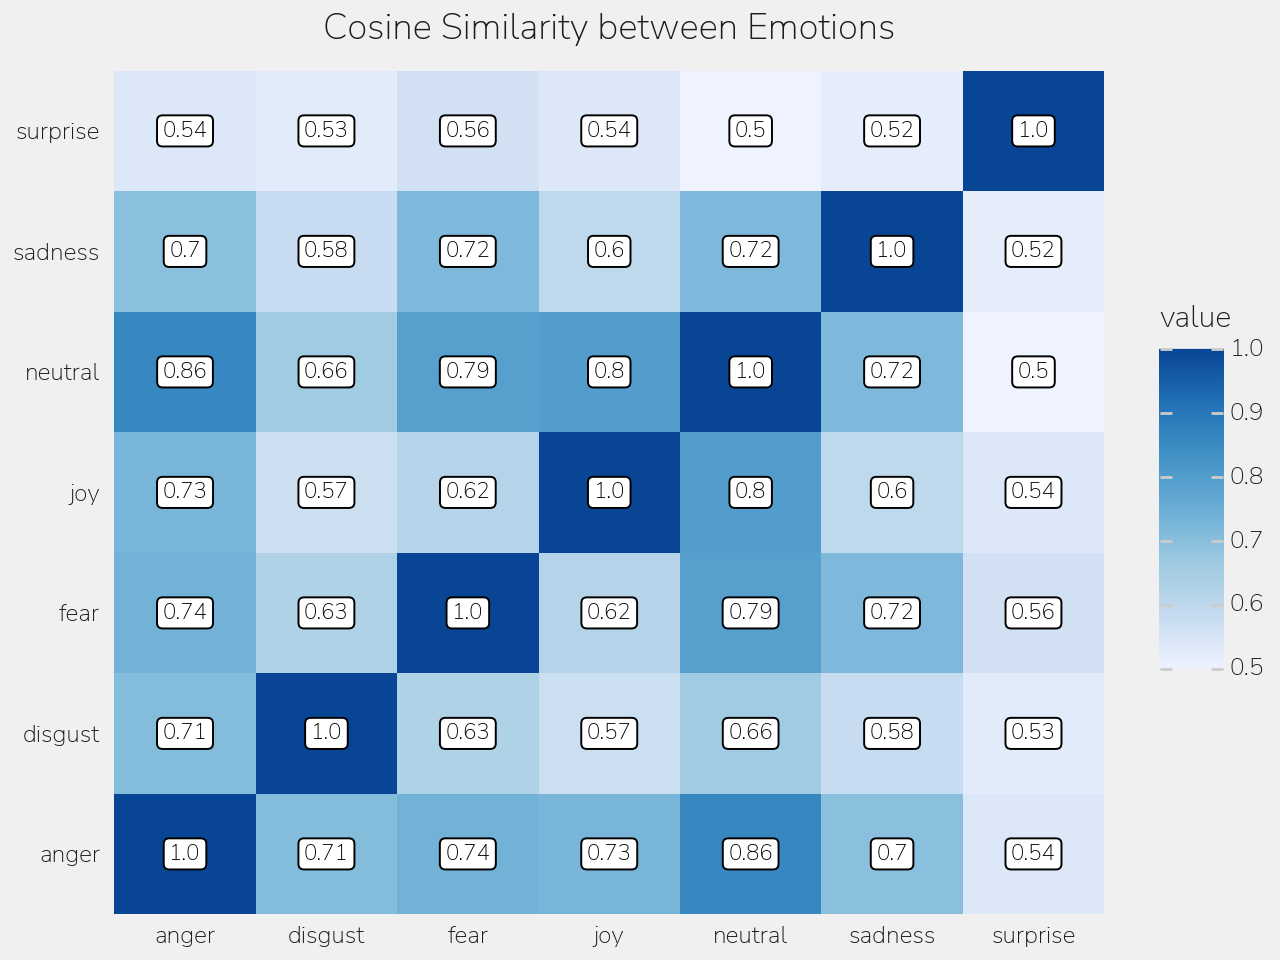

In [234]:
(
  ggplot(
    cosine_sim_df.unpivot(index='Emotion', variable_name='Emotion2') \
      .with_columns(pl.col('value').round(2).alias('value')),
    aes('Emotion', 'Emotion2', fill='value')
  ) +
  geom_tile() +
  geom_label(aes(label = 'value'), fill='white', size=8) +
  scale_fill_distiller() +
  labs(title='Cosine Similarity between Emotions', x='', y='')
)